Handling input: Why the "$" ?

In [ ]:
import string
import math

def userInput():
    userMessage = input("Please enter what you would like to encode/pattern search: ")
    userMessage += '$'
    return userMessage

Constructing the suffix array

In [ ]:
def constructArray(userMessage):
    suffixArray = []
    for i in range(0, len(userMessage)):
        suffixArray.append((userMessage[i:len(userMessage)], i))
    suffixArray.sort(key=lambda tup: tup[0])
    return suffixArray

Construting the BWT
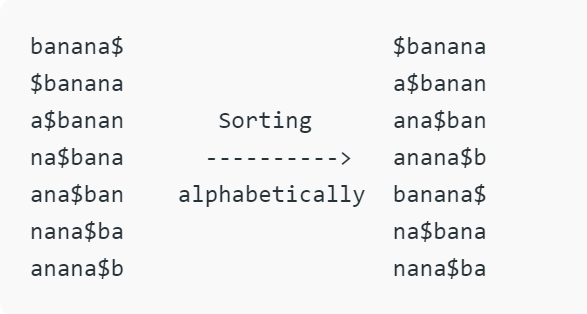

In [ ]:
def constructBWT(userMessage, suffixArray):
    BWT = ''
    for i in range(len(suffixArray)):
        print(suffixArray[i])
        BWT += userMessage[suffixArray[i][1]-1]
    return BWT

Move to front encoding: But Why

In [ ]:
def moveToFront(BWT): 
    
    asciis = [chr(i) for i in range(256)]
    encodedMTF = []
    
    for b in range(len(BWT)):
        rank = asciis.index(BWT[b])
        encodedMTF.append(str(rank))
        asciis.pop(rank)
        asciis.insert(0, BWT[b])
        
    return encodedMTF

Undo It All!!!

In [ ]:
def unMoveToFront(encodedMTF):
    
    asciis = [chr(i) for i in range(256)]
    decodedMTF = ''
    
    for b in range(len(encodedMTF)):
        character = asciis[int(encodedMTF[b])]
        decodedMTF += character
        asciis.pop(asciis.index(character))
        asciis.insert(0, character)
        
    return decodedMTF

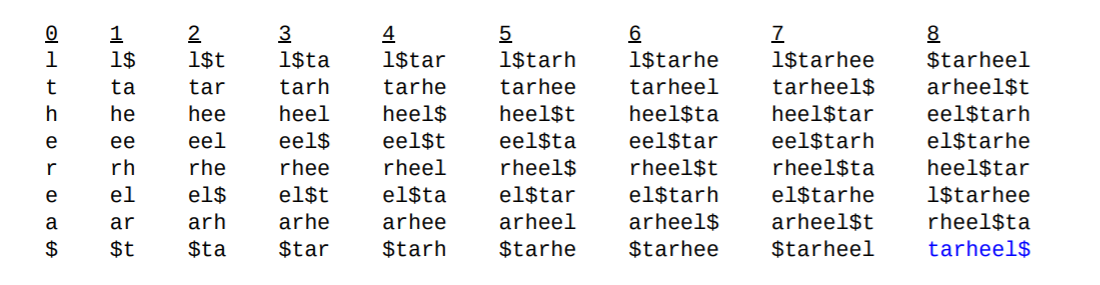

In [ ]:
def inverseBWT(BWT):
    table = ['' for c in BWT]
    for j in range(len(BWT)):
        table = sorted([c+table[i] for i, c in enumerate(BWT)])
    return table[BWT.index("$")]
    

In [ ]:
def printArray(array):
    print(*array, sep = ", ")

Pattern Searching
                                          ▒▒                                          
                                        ▓▓▓▓▓▓░░                                      
                                    ░░██████▓▓██░░                                    
                                ░░▒▒██████████▓▓██                                    
                              ░░▒▒████████████▓▓▒▒██                                  
                              ▒▒▒▒████████████▓▓▓▓▓▓▓▓                                
                            ░░▒▒▓▓██████████████▓▓██▓▓                                
                    ▒▒▒▒░░░░▒▒▒▒▓▓████████████████▓▓▓▓                                
                  ▒▒██░░▒▒▒▒▒▒██▓▓████████████████▓▓██                                
                  ▓▓████▓▓██████████████████████████▓▓                                
                  ▒▒████████▓▓▒▒██████████████████▓▓▓▓                                
                ░░▒▒██████████▒▒██████████████████▓▓▓▓▓▓                              
              ░░░░▒▒██████████████████████████████████▓▓░░                            
              ▒▒░░▓▓▓▓████████████████████████████▓▓▒▒██▓▓▒▒                          
            ░░▒▒░░██▓▓████████████████████████████                                    
          ░░▓▓▒▒▓▓██▓▓████████████████████████████                                    
        ▒▒▒▒▒▒▓▓▓▓██▓▓▓▓██████████████████████████                                    
      ░░░░▓▓██████████████████████████████████░░░░                                    
      ░░▓▓▓▓██▓▓██▓▓██████████▓▓▒▒▓▓████████▓▓                                        
      ▓▓██▒▒▓▓██████████████████▒▒██▓▓████▒▒  ▒▒                                      
    ▓▓██▓▓▒▒▓▓████████████████▓▓██▒▒▓▓▒▒░░    ██                                      
    ▓▓▓▓░░▓▓▓▓████████████████████▓▓██░░      ██  ▓▓                          ▓▓▒▒  ░░
  ░░██▒▒▒▒▓▓████████████████▓▓██▓▓██▒▒▓▓      ██░░████░░                    ▓▓        
  ████░░▒▒▓▓██████████████████████▓▓████      ▒▒██████                      ░░        
  ██▒▒░░▓▓████████████████████▒▒████▓▓██      ▓▓████▒▒                    ░░          
▒▒▒▒▒▒▓▓████████████████▓▓▓▓██▓▓▒▒▓▓▓▓▓▓░░  ▒▒██████▓▓▓▓                  ▒▒        ▓▓
▓▓▒▒▒▒████████████████▓▓▓▓▓▓▓▓██▓▓▒▒▓▓▓▓▒▒    ██████████                  ░░      ░░  
██░░▓▓████▓▓██████████▓▓▓▓▓▓▒▒██▒▒▓▓▓▓▓▓██  ██████████▒▒                    ░░░░▒▒    
▒▒▒▒██████████████████▓▓████▒▒████▒▒██▓▓██████████████                      ▓▓        
▒▒▓▓████████▓▓██████████████▓▓████▓▓██▓▓████████████                  ░░▒▒▒▒▓▓░░      
▓▓██████████▓▓██████████████▓▓▓▓████▓▓████████▓▓                  ██████████████      
▓▓██████████████████████████▓▓▓▓████████████▓▓██              ▒▒████████████████      
████████████████████████████▓▓██████████████████            ████████████████▓▓        
██████████▓▓████████████████████▓▓████▓▓▒▒████████      ░░████████████████████        
████████████████████████████████▓▓████▓▓▓▓████████    ▒▒████████████████████          
████████████████████████████████▓▓██████▓▓▓▓██████  ▓▓████████████████████▓▓          
████████████████████████████████▓▓██████████████████████████████▒▒░░  ▒▒              
████████████████████████████████████████▓▓████████████████████        ▒▒              
████████████████████████████████████████▓▓██████████████████                          
██████▓▓██████████████████████████████████████████████████                            
██████▓▓████████████████████████████████████████████████                              
████████████████████████████████████████████████████▒▒                                
████▓▓████████████████████████████████████████████░░                                  
████░░██████████████████████████████████████████                                      
████▒▒██████████████████████████████████████▓▓░░                                      
████▓▓████████████████████████████████████████                                        
██▓▓██████████████████████████████████████████                                        


In [ ]:
#INCLUDED FOR COMPARISON ONLY

def findLast(pattern, userMessage, suffixarray):
    lo, hi = 0, len(userMessage)
    while (lo < hi):
        middle = (lo+hi)//2
        #print(middle)
        if userMessage[suffixarray[middle][1]:suffixarray[middle][1]+len(pattern)] <= pattern:
            lo = middle + 1
        else:
            hi = middle
    return lo
def findFirst(pattern, userMessage, suffixarray):
    lo, hi = 0, len(userMessage)
    while (lo < hi):
        middle = int((lo+hi)/2)
        #print(middle)
        if userMessage[suffixarray[middle][1]:] < pattern:
            lo = middle + 1
        else:
            hi = middle
    return lo

def findAllPatterns(pattern, userMessage, suffixArray):
    first = findFirst(pattern, userMessage, suffixArray)
    last = findLast(pattern, userMessage, suffixArray)
    print ("Total matches: " + str(last - first))
    return (last-first)

In [ ]:
def FMIndex(bwt):
    fm = [{c: 0 for c in bwt}]
    for c in bwt:
        row = {symbol: count + 1 if (symbol == c) else count for symbol, count in fm[-1].items()}
        fm.append(row)
    offset = {}
    N = 0
    for symbol in sorted(row.keys()):
        offset[symbol] = N
        N += row[symbol]
    return fm, offset


def findBWT(pattern, FMIndex, Offset):
    lo = 0
    hi = len(FMIndex) - 1
    for symbol in reversed(pattern):
        lo = Offset[symbol] + FMIndex[lo][symbol]
        hi = Offset[symbol] + FMIndex[hi][symbol]
    return lo, hi

Please reference my other project :)

In [ ]:
from queue import PriorityQueue

class BinaryTree:
    def __init__(self, char, freq, left=None, right=None, parent=None):
        self.character = char
        self.frequency = freq
        self.leftChild = left
        self.rightChild = right
        self.parent = parent
    
    def __str__(self):
        return (str(self.character) + ", " + str(self.frequency))
            
    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def getCharVal(self):
        return self.character
    
    def getFreqVal(self):
        return self.frequency
    
    def isLeaf(self):
        return not (self.rightChild or self.leftChild)
    def isTop(self):
        return (self.getFreqVal == 1)

In [ ]:
#https://stackoverflow.com/questions/991350/counting-repeated-characters-in-a-string-in-python

def makeFrequencies(msg):
    freq = {}
    setup = [(i,msg.count(i)) for i in set(msg)]
    for i in range(len(setup)):
        freq[setup[i][0]] = (setup[i][1]/len(msg))
    return freq

def getKeys(dict): 
    return dict.keys() 
def getValues(dict): 
    return dict.values() 

In [ ]:
def makeQueue(freq):
    q = PriorityQueue()
    klist = list(getKeys(freq))
    flist = list(getValues(freq))
    for i in range(len(flist)):
        q.put((flist[i], id(BinaryTree(str(klist[i]), flist[i])), BinaryTree(str(klist[i]), flist[i])))
    return q

In [ ]:
def printTree(tree):
    print("Main val: " + str(tree.getFreqVal()))
    print("main tree left: " +str(tree.getLeftChild()))
    print("main tree right:" + str(tree.getRightChild()))
    print("left child, left child: " + str(tree.getLeftChild().getLeftChild()))
    print("left child, right child: " + str(tree.getLeftChild().getRightChild()))
    print("right child, left child: " + str(tree.getRightChild().getLeftChild()))
    print("right child, right child: " + str(tree.getRightChild().getRightChild()))
    
def buildTree(q):
    size = q.qsize()
    if(size//2 != 0):
        node1 = q.get()
        node2 = q.get()
        nodeSums = node1[0] + node2[0]
        tree = BinaryTree("EMPTY", nodeSums, node1[2], node2[2])
        q.put((nodeSums, id(tree), tree))
        buildTree(q)
    return q

In [ ]:
def makeCode(root, ans, table):
    if (root != None):
        if (root.getLeftChild() != None):
            makeCode(root.getLeftChild(), ans+"0", table)
        if (root.getRightChild() != None):
            makeCode(root.getRightChild(), ans+"1", table)
        if (root.isLeaf()):
            table[root.getCharVal()] =  ans
    return table

In [ ]:
def encodeMessage(msg, table):
    ans = ""
    for i in range(len(msg)):
        ans += table[msg[i]] + " "
    return ans

In [ ]:
def bitCounter(msg):
    msg = msg.replace(" ", "")
    return len(msg)

In [ ]:
def decodeMessage(msg, tree):
    og = tree
    ans = ""
    for i in range(len(msg)):
        if(msg[i] == "0"):
            tree = tree.getLeftChild()
        elif(msg[i] == "1"):
            tree = tree.getRightChild()
        else:
            ans+= (tree.getCharVal() + ", ")
            tree = og
            i += 1
    size = len(ans)
    finalAns = ans[:size - 2]
    return finalAns

Outcomes:

In [ ]:
def main():
    
    #Ask user for original message
    
    userMsg = userInput()
    
    #Construct suffix array based on original message
    
    sA = constructArray(userMsg)
    
    #Perform Burrows Wheeler Transfrom using the suffix array

    BWT = constructBWT(userMsg, sA)
    
    #Locate patterns by creating an FM Index from the suffix array

    FM, Offset = FMIndex(BWT)
    
    #Hardcoded visualization of FM Index
    if(userMsg == "banana$"):
        print ("%2s, %2s,%2s,%2s" % tuple([symbol for symbol in sorted(Offset.keys())]))
        for row in FM:
            print ("%2d, %2d,%2d,%2d" % tuple([row[symbol] for symbol in sorted(row.keys())]))

        pattern = "ana"
        matches = findAllPatterns(pattern, userMsg, sA)
        if(matches != 0):
            print("Index of substring including pattern, exclusive of last index: " + str(findBWT(pattern, FM, Offset)))

    #Move to front encoding of BWT and mapping from list to string
    MTF = moveToFront(BWT)
    readableMTF = ' '.join(map(str, MTF)) 
    
    #Creates frequency table for Huffman Encoding
    
    freq = makeFrequencies(MTF)
    freq2 = makeFrequencies(userMsg)
    
    #Creates original Priority Queue using frequency table
    
    queue = makeQueue(freq)
    queue2 = makeQueue(freq2)
    
    #Manipulates priority queue so that only one node remains
    
    tree = buildTree(queue)
    tree2 = buildTree(queue2)
    masterNode = tree.get()
    masterNode2 = tree2.get()
    
    #Creates individual binary codes for each charatcer based off of the master node
    
    bitTable = {}
    bitTable = makeCode(masterNode[2], "", bitTable)
    bitTable2 = {}
    bitTable2 = makeCode(masterNode2[2], "", bitTable2)
    
    #Generates final encoded Huffman Message
    
    encodedMsg = encodeMessage(MTF, bitTable)
    totalBits = bitCounter(encodedMsg)
    
    encodedMsg2 = encodeMessage(userMsg, bitTable2)
    totalBits2 = bitCounter(encodedMsg2)
    
    #Performs both transforms and encoding in reverse order
    #Reversal of Huffman Encoding
    
    decodedMsg = decodeMessage(encodedMsg, masterNode[2])
    decodedList = list(decodedMsg.split(", "))
    
    #Reversal of Move to Front Encoding
    
    uMTF = unMoveToFront(decodedList)
    
    #Reversal of Burrows Wheeler Transform
    
    iBWT = inverseBWT(uMTF)
    
    #Print output
    print("Burrows Wheeler Transform: " + BWT)
    print("Move to front encoding: " + readableMTF)
    print("Encoded Huffman message: " + encodedMsg)
    
    #If string is only one charatcer (just "l" no spaces, no commas, etc.), it only uses whitespace to decode
    
    if(encodedMsg.isspace()):
        print("Total Huffman bits with Burrows Wheeler Transform: " + str(len(encodedMsg))) 
    else:
        print("Total Huffman bits with Burrows Wheeler Transform: " + str(totalBits) + " vs. Total Huffman bits without Burrows Wheeler Transform: " + str(totalBits2))
        print("Percentage improvement: " + str((((totalBits2-totalBits))/totalBits2)*100) + "%")
    print("Total ASCII bits: " + str(len(userMsg) * 8))
    print("Decoded Huffman message: " + decodedMsg)
    print("Move to front decoding: " + uMTF)
    print("Burrows Wheeler Inverse: " + iBWT)

if __name__ == '__main__':
    main()